In [1]:
%matplotlib inline

In [46]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as po
import matplotlib.pyplot as plt
from os import system
import seaborn
# For model validation and output summary
from sklearn.metrics import confusion_matrix, roc_curve, auc
# For CHAID
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [3]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10)

In [4]:
data = po.DataFrame(np.c_[y, X], columns=['var_'+str(col) for col in range(21)])

In [18]:
data.head()

array([[-0.37157539, -0.70337849, -2.23843733, ..., -0.80054048,
        -1.00550152, -1.24319397],
       [ 0.17608552, -1.2815431 ,  1.01002519, ...,  0.35896438,
        -0.79852591, -0.89243464],
       [-1.0876006 , -0.08836988, -3.00754654, ..., -1.13795885,
        -0.1575437 , -1.52691108],
       ..., 
       [-0.28975769,  0.52772604,  2.82557015, ..., -2.24249936,
         0.21385958,  0.1697526 ],
       [-0.20657795, -1.93612241, -1.2361126 , ..., -0.22876658,
        -0.5731015 , -0.26018754],
       [ 1.38752021,  1.45626003,  0.22385658, ..., -3.34484375,
        -2.62424164,  0.25840064]])

In [6]:
data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.50000,-0.000984,-1.109814,0.490153,0.063456,-0.454847,-0.029480,0.035670,0.659422,-0.021842,...,0.036043,-1.619439,-0.915703,2.071521,-0.540900,-0.561226,0.017878,0.012849,-1.045189,-0.013333
std,0.50025,0.989889,1.934146,2.005425,0.979406,2.116120,0.962623,1.031772,1.860170,0.968406,...,1.982305,2.984627,1.791097,3.235475,1.820733,1.786381,0.994020,2.330434,1.581277,0.964155
min,0.00000,-2.652809,-8.418874,-5.726555,-3.755716,-7.433385,-3.079762,-3.088329,-6.141195,-3.030867,...,-7.156723,-16.160266,-6.157221,-7.949803,-6.048693,-5.710712,-3.357261,-7.295183,-6.282714,-3.032693
25%,0.00000,-0.694303,-2.241070,-0.942246,-0.571582,-1.845180,-0.686755,-0.585394,-0.509889,-0.670063,...,-1.418942,-3.383362,-2.088095,0.029139,-1.895533,-1.792626,-0.653849,-1.505973,-2.117954,-0.662304
50%,0.50000,-0.009867,-1.101449,0.617368,0.069598,-0.373036,-0.010216,0.051807,0.718789,0.016636,...,0.026101,-1.419234,-0.900370,1.864989,-0.594139,-0.598424,-0.010413,-0.036469,-1.026733,-0.015051
75%,1.00000,0.693841,0.035530,1.954592,0.689954,0.981212,0.621437,0.719822,1.895104,0.627626,...,1.453144,0.446503,0.252585,4.146323,0.665777,0.595930,0.660395,1.622836,0.006705,0.612277
max,1.00000,2.864115,6.908846,6.922735,3.169434,6.155143,3.119480,3.146769,6.279870,3.018822,...,6.132562,7.139589,5.014744,13.846913,5.114210,5.269308,3.895631,6.405400,3.666015,3.040945


In [22]:
data_new = data.copy()
data_new['is_train'] = np.random.random(size=data_new.shape[0]) < 0.8
train = data_new[data_new['is_train']==True]
test = data_new[data_new['is_train']==False]

In [24]:
# Declare the model to be executed
clf = DecisionTreeClassifier(random_state = 0)

In [25]:
# Execute models in Sklearn under Fit(x,y)
clf.fit(train.iloc[:,1:],train.iloc[:,0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [26]:
y_pred = clf.predict_proba(test.iloc[:,1:])[:, 1]
y_pred1 = clf.predict(test.iloc[:,1:])

In [27]:
confusion_matrix(test['var_0'], y_pred1)

array([[61, 24],
       [45, 76]])

In [32]:
fpr, tpr, _ = roc_curve(test['var_0'], y_pred)
roc_auc = auc(fpr, tpr)

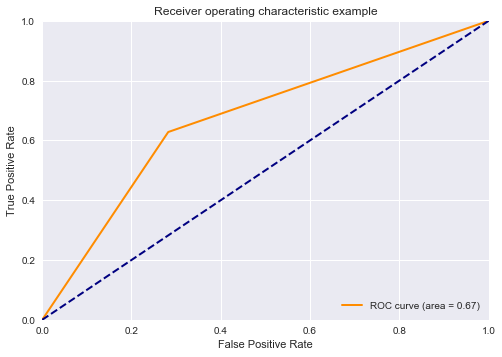

In [33]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

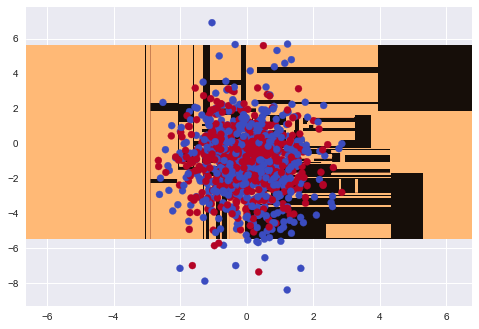

In [42]:
clf1 = DecisionTreeClassifier(random_state = 0)
clf1.fit(train.iloc[:,[8,15]],train.iloc[:,0])
# Set min and max values and give it some padding
x_min, x_max = test['var_8'].min() - .5, test['var_8'].max() + .5
y_min, y_max = test['var_15'].min() - .5, test['var_15'].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, np.round(Z), cmap=plt.cm.copper)
plt.scatter(X[:, 0], X[:, 1], c=data['var_0'], cmap=plt.cm.coolwarm)

In [57]:
dotfile = open("E:/Learning/logit/dtree2.dot", 'w')
tree.export_graphviz(clf, out_file = dotfile, feature_names = data.columns)
dotfile.close()
system("dot -Tpng E:/Learning/logit/dtree2.dot -o E:/Learning/logit/dtree2.png")

1

In [3]:
# aDD tERMINAL nODE FUNCTION